#Fine Tuning 이전 Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# CIFAR-100 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32,32, 3)))

# 모델의 모든 층을 고정
for layer in base_model.layers:
    layer.trainable = False

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)


169001437/169001437 [==============================] - 4s 0us/step


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/10
782/782 [==============================] - 21s 13ms/step - loss: 4.2018 - accuracy: 0.0756 - val_loss: 4.0633 - val_accuracy: 0.0953
Epoch 2/10
782/782 [==============================] - 8s 10ms/step - loss: 3.9308 - accuracy: 0.1095 - val_loss: 4.0054 - val_accuracy: 0.1024
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 3.8097 - accuracy: 0.1282 - val_loss: 3.9803 - val_accuracy: 0.1090
Epoch 4/10
782/782 [==============================] - 9s 12ms/step - loss: 3.7119 - accuracy: 0.1444 - val_loss: 3.9809 - val_accuracy: 0.1080
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 3.6202 - accuracy: 0.1658 - val_loss: 3.9808 - val_accuracy: 0.1105
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 3.5388 - accuracy: 0.1799 - val_loss: 4.0073 - val_accuracy: 0.1093
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 3.

Epoch 1/10
782/782 [==============================] - 14s 18ms/step - loss: 3.1926 - accuracy: 0.2566 - val_loss: 4.1396 - val_accuracy: 0.1077
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 3.1350 - accuracy: 0.2711 - val_loss: 4.1848 - val_accuracy: 0.1070
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 3.0804 - accuracy: 0.2839 - val_loss: 4.2323 - val_accuracy: 0.1046
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 3.0304 - accuracy: 0.2958 - val_loss: 4.2709 - val_accuracy: 0.1043
Epoch 5/10
782/782 [==============================] - 10s 13ms/step - loss: 2.9807 - accuracy: 0.3067 - val_loss: 4.3212 - val_accuracy: 0.1036
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 2.9357 - accuracy: 0.3208 - val_loss: 4.3673 - val_accuracy: 0.1034
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 2.8933 - accuracy: 0.3291 - val_loss: 4.4057 - val_accuracy: 0.10

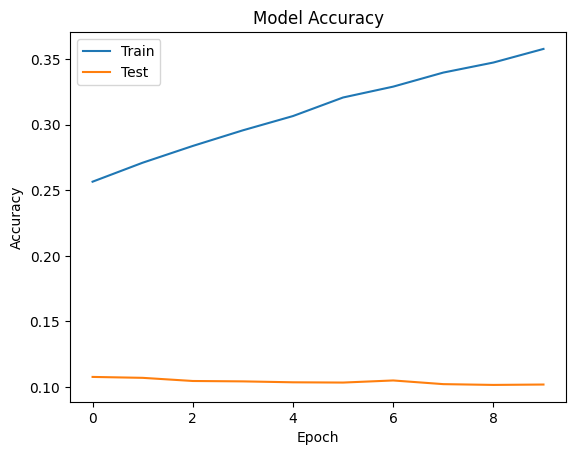

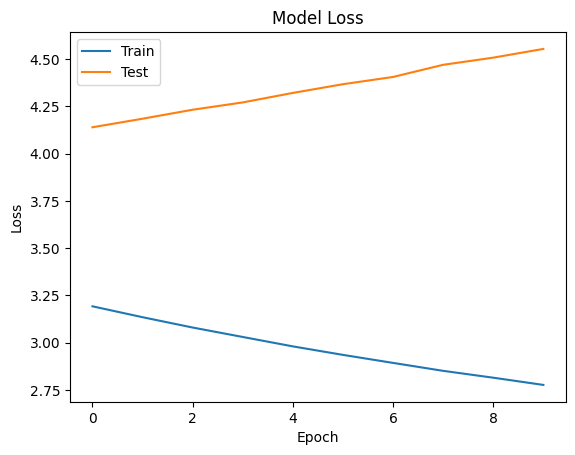

In [ ]:
import matplotlib.pyplot as plt

# 모델 훈련 및 히스토리 저장
history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions

# 사전 훈련된 MobileNetV2 모델 로드
model = MobileNetV2(weights='imagenet')

14536120/14536120 [==============================] - 0s 0us/step


### 이미지 확인 <br>
1. 구글드라이브에 원하는 이미지를 업로드한다.<br>
2. 업로드한 이미지를 우클릭하여 공유가능한 링크 가져오기를 클릭 <br>
   이때 권한을 '링크가 있는 모든 사용자에게 공개'로 변환<br>
3. 예시 링크 <br>
https://drive.google.com/file/d/13473X3IG8VpKdxhO9E5JkA810Gz6ngd4/view?usp=sharing <br>
4. 여기서 img id를 가져오기 <br>
13473X3IG8VpKdxhO9E5JkA810Gz6ngd4 가 이미지 아이디에 해당 <br>
5. 텍스트 셀을 추가한 후 <br>
img src = "https://drive.google.com/uc?export=view&id=13473X3IG8VpKdxhO9E5JkA810Gz6ngd4" height = "" width ="" 의 내용을 html 문법으로 작성 <br>

<img src = "https://drive.google.com/uc?export=view&id=1aUi3iOsHvvmNC2WydZkDxF0XKCdztt2I" height = '500' width = ''> <br>

In [ ]:
# 이미지를 로드하고 전처리
img = image.load_img('dolphin.jpg', target_size=(224, 224))  # MobileNetV2의 기본 입력 크기에 맞게 조정
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 이미지에 대한 예측 수행
predictions = model.predict(img_array)

# 예측 결과 해석
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 0s 23ms/step
1: sea_lion (0.10)
2: grey_whale (0.10)
3: albatross (0.04)


<img src = "https://drive.google.com/uc?export=view&id=1dtTmmdUns_-XvN__HRRsiwZWPV_Y3lGS" height = '' width = ''> <br>

In [ ]:
# 이미지를 로드하고 전처리
img = image.load_img('fish.png', target_size=(224, 224))  # MobileNetV2의 기본 입력 크기에 맞게 조정
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# 이미지에 대한 예측 수행
predictions = model.predict(img_array)

# 예측 결과 해석
decoded_predictions = decode_predictions(predictions, top=3)[0]
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


1/1 [==============================] - 0s 35ms/step
1: goldfish (0.97)
2: rock_beauty (0.00)
3: anemone_fish (0.00)


#Fine Tuning 적용

pre-trained model이 input data에 맞도록 조정  
데이터 정규화 적용  
output쪽 layer들 동결 해제  
새로운 분류층에 dropout 적용  
데이터 증강 추가 적용  
learning rate 바꿔가며 학습

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CIFAR-100 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32,32,3)))

# 모델의 마지막 몇 개의 층을 고정 해제
for layer in base_model.layers[-20:]:
    layer.trainable = True

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x) # 노드 수를 1024에서 512로 줄임
x = Dropout(0.2)(x) # 수치 조정
predictions = Dense(100, activation='softmax')(x) # CIFAR-100은 100개의 클래스를 가짐

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=15,  # 더 작은 회전 범위
    width_shift_range=0.1,  # 이동 범위
    height_shift_range=0.1,  # 이동 범위
    shear_range=0.1,  # 전단 변환 범위
    zoom_range=0.1,  # 확대/축소 범위
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(x_train, y_train, batch_size=32) #batch size 32

# 에폭 수를 늘림
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,
    epochs=15,  # 에폭 수 15
    validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)

Epoch 1/15
1562/1562 [==============================] - 103s 52ms/step - loss: 4.3126 - accuracy: 0.0523 - val_loss: 8.3867 - val_accuracy: 0.0100
Epoch 2/15
1562/1562 [==============================] - 76s 49ms/step - loss: 3.9072 - accuracy: 0.0956 - val_loss: 8.7476 - val_accuracy: 0.0154
Epoch 3/15
1562/1562 [==============================] - 76s 48ms/step - loss: 3.8065 - accuracy: 0.1076 - val_loss: 6.0631 - val_accuracy: 0.0146
Epoch 4/15
1562/1562 [==============================] - 76s 49ms/step - loss: 3.7504 - accuracy: 0.1153 - val_loss: 6.6346 - val_accuracy: 0.0187
Epoch 5/15
1562/1562 [==============================] - 77s 49ms/step - loss: 3.5977 - accuracy: 0.1363 - val_loss: 3.9084 - val_accuracy: 0.1260
Epoch 6/15
1562/1562 [==============================] - 78s 50ms/step - loss: 3.5452 - accuracy: 0.1468 - val_loss: 5.1979 - val_accuracy: 0.0498
Epoch 7/15
1562/1562 [==============================] - 84s 54ms/step - loss: 3.5972 - accuracy: 0.1402 - val_loss: 4.6525 

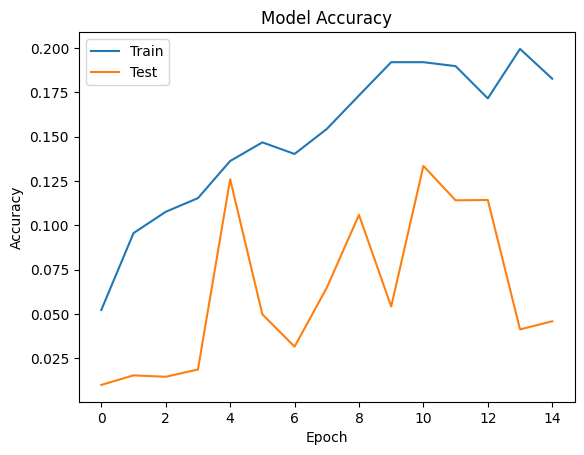

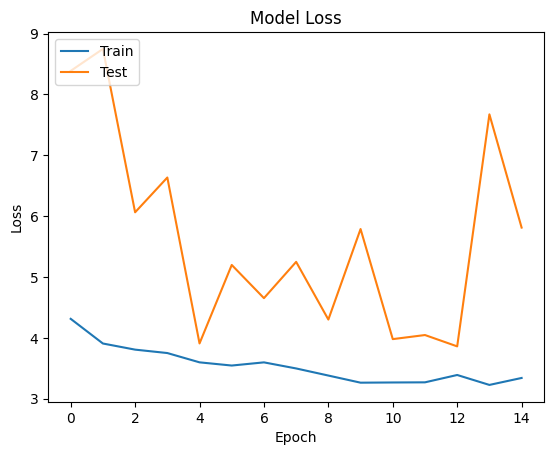

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##추가 시도  
새로운 layer를 추가하고  
learning rate를 낮춤  
논문을 참고하여 batch size를 256으로 정함

TABLE I. Classification accuracy of the pre-trained  
MobileNetV2 model on different batch sizes.  
Batch Sizes CIFAR10 CIFAR100  
32 93.83 74.32  
64 93.97 76.26  
128 93.88 76.71  
256 93.66 76.97  
512 93.53 76.49  
출처: 사전 훈련된 딥 러닝 모델의 파인튜닝을 위한 최적의 배치 크기(아흐마드 이자즈, 신석주*
컴퓨터공학과, 조선대학교)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CIFAR-100 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32,32,3)))

# 모델의 마지막 몇 개의 층을 고정 해제
for layer in base_model.layers[-20:]:
    layer.trainable = True

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x) # 노드 수 변경
x = Dropout(0.2)(x) # 수치 조정
predictions = Dense(100, activation='softmax')(x) # CIFAR-100은 100개의 클래스를 가짐

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) #lr 낮추기

train_datagen = ImageDataGenerator(
    rotation_range=15,  # 더 작은 회전 범위
    width_shift_range=0.1,  # 이동 범위
    height_shift_range=0.1,  # 이동 범위
    shear_range=0.1,  # 전단 변환 범위
    zoom_range=0.1,  # 확대/축소 범위
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(x_train, y_train, batch_size=256) #batch size 256

# 에폭 수를 늘림
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 256,
    epochs=15,  # 에폭 수 15
    validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)

Epoch 1/15
195/195 [==============================] - 82s 203ms/step - loss: 4.6179 - accuracy: 0.0208 - val_loss: 4.6089 - val_accuracy: 0.0100
Epoch 2/15
195/195 [==============================] - 40s 203ms/step - loss: 4.3233 - accuracy: 0.0610 - val_loss: 4.6140 - val_accuracy: 0.0120
Epoch 3/15
195/195 [==============================] - 37s 190ms/step - loss: 4.0038 - accuracy: 0.1061 - val_loss: 4.6315 - val_accuracy: 0.0095
Epoch 4/15
195/195 [==============================] - 37s 191ms/step - loss: 3.7329 - accuracy: 0.1439 - val_loss: 4.6179 - val_accuracy: 0.0100
Epoch 5/15
195/195 [==============================] - 38s 196ms/step - loss: 3.5292 - accuracy: 0.1721 - val_loss: 4.6427 - val_accuracy: 0.0100
Epoch 6/15
195/195 [==============================] - 37s 192ms/step - loss: 3.3640 - accuracy: 0.2017 - val_loss: 4.6968 - val_accuracy: 0.0100
Epoch 7/15
195/195 [==============================] - 39s 202ms/step - loss: 3.2262 - accuracy: 0.2233 - val_loss: 4.7991 - val_ac

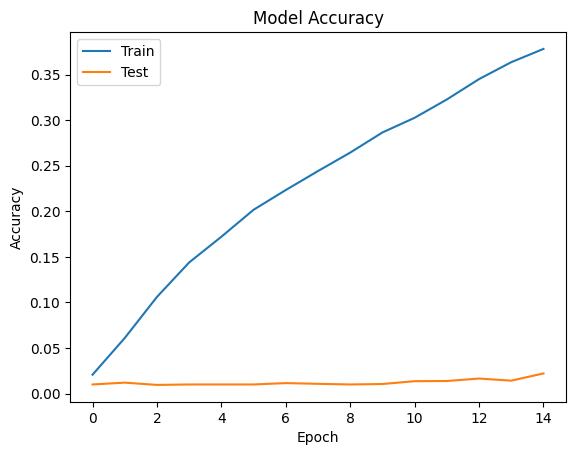

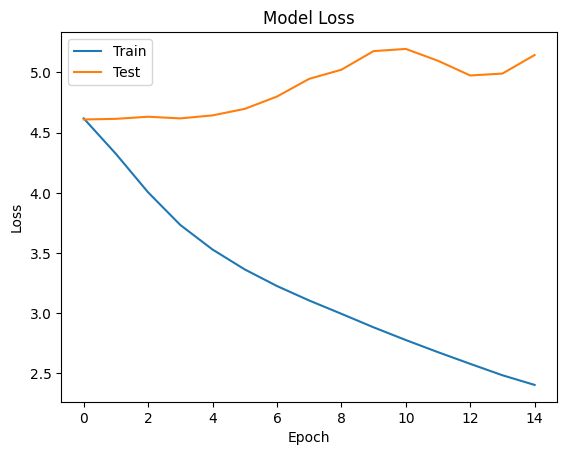

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##추가 시도2
learning rate, batch size, 증강 조절

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CIFAR-100 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32,32,3)))

# 모델의 마지막 몇 개의 층을 고정 해제
for layer in base_model.layers[-20:]:
    layer.trainable = True

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x) # 노드 수 변경
x = Dropout(0.2)(x) # 수치 조정
predictions = Dense(100, activation='softmax')(x) # CIFAR-100은 100개의 클래스를 가짐

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy']) #lr 낮추기

train_datagen = ImageDataGenerator(
    rotation_range=15,  # 더 작은 회전 범위
    width_shift_range=0.1,  # 이동 범위
    height_shift_range=0.1,  # 이동 범위
    shear_range=0.1,  # 전단 변환 범위
    zoom_range=0.1,  # 확대/축소 범위
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # 밝기 조절 범위 추가
    channel_shift_range=10.0,  # 채널 이동 범위 추가
    fill_mode='nearest')

train_generator = train_datagen.flow(x_train, y_train, batch_size=64) #batch size 64

# 에폭 수를 늘림
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 64,
    epochs=15,  # 에폭 수 15
    validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)

169001437/169001437 [==============================] - 10s 0us/step


9406464/9406464 [==============================] - 1s 0us/step
Epoch 1/15
781/781 [==============================] - 104s 90ms/step - loss: 4.6558 - accuracy: 0.0107 - val_loss: 4.6051 - val_accuracy: 0.0084
Epoch 2/15
781/781 [==============================] - 69s 88ms/step - loss: 4.6112 - accuracy: 0.0105 - val_loss: 4.6082 - val_accuracy: 0.0061
Epoch 3/15
781/781 [==============================] - 69s 88ms/step - loss: 4.6022 - accuracy: 0.0116 - val_loss: 4.6102 - val_accuracy: 0.0106
Epoch 4/15
781/781 [==============================] - 69s 88ms/step - loss: 4.5943 - accuracy: 0.0119 - val_loss: 4.6208 - val_accuracy: 0.0113
Epoch 5/15
781/781 [==============================] - 69s 89ms/step - loss: 4.5928 - accuracy: 0.0124 - val_loss: 4.6329 - val_accuracy: 0.0097
Epoch 6/15
781/781 [==============================] - 70s 90ms/step - loss: 4.5903 - accuracy: 0.0126 - val_loss: 4.6167 - val_accuracy: 0.0122
Epoch 7/15
781/781 [==============================] - 68s 87ms/step - lo

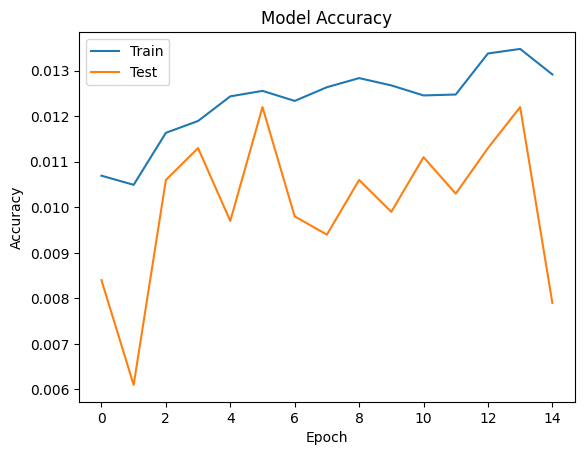

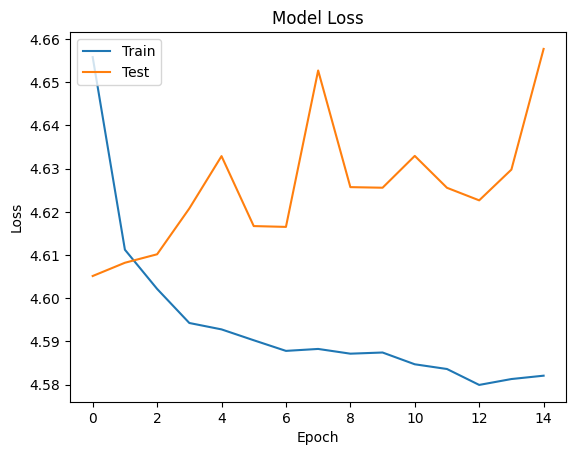

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##추가 시도3

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CIFAR-100 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32,32,3)))

# 모델의 마지막 몇 개의 층을 고정 해제
for layer in base_model.layers[-20:]:
    layer.trainable = True

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x) # 노드 수를 1024에서 512로 줄임
x = Dropout(0.2)(x) # 수치 조정
predictions = Dense(100, activation='softmax')(x) # CIFAR-100은 100개의 클래스를 가짐

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=15,  # 더 작은 회전 범위
    width_shift_range=0.1,  # 이동 범위
    height_shift_range=0.1,  # 이동 범위
    shear_range=0.1,  # 전단 변환 범위
    zoom_range=0.1,  # 확대/축소 범위
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(x_train, y_train, batch_size=32) #batch size 32

# 에폭 수를 늘림
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,
    epochs=15,  # 에폭 수 15
    validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)

Epoch 1/15
1562/1562 [==============================] - 92s 45ms/step - loss: 4.1631 - accuracy: 0.0713 - val_loss: 5.4373 - val_accuracy: 0.0084
Epoch 2/15
1562/1562 [==============================] - 69s 44ms/step - loss: 3.5216 - accuracy: 0.1572 - val_loss: 7.6404 - val_accuracy: 0.0110
Epoch 3/15
1562/1562 [==============================] - 69s 44ms/step - loss: 3.1791 - accuracy: 0.2163 - val_loss: 7.8455 - val_accuracy: 0.0155
Epoch 4/15
1562/1562 [==============================] - 69s 44ms/step - loss: 3.0170 - accuracy: 0.2434 - val_loss: 6.9365 - val_accuracy: 0.0559
Epoch 5/15
1562/1562 [==============================] - 70s 45ms/step - loss: 2.8775 - accuracy: 0.2732 - val_loss: 4.4435 - val_accuracy: 0.1300
Epoch 6/15
1562/1562 [==============================] - 70s 45ms/step - loss: 2.7744 - accuracy: 0.2917 - val_loss: 2.8869 - val_accuracy: 0.2956
Epoch 7/15
1562/1562 [==============================] - 70s 45ms/step - loss: 2.6531 - accuracy: 0.3166 - val_loss: 4.4221 -

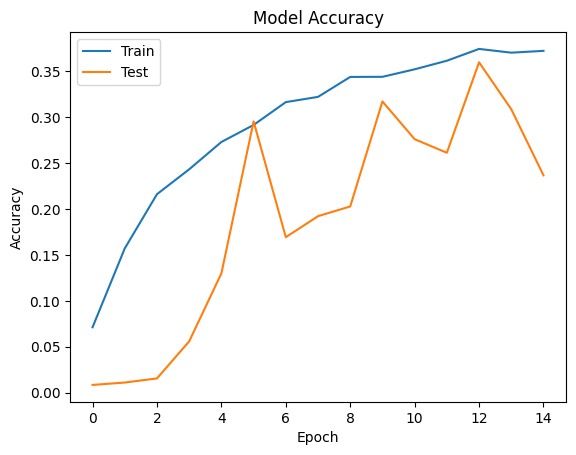

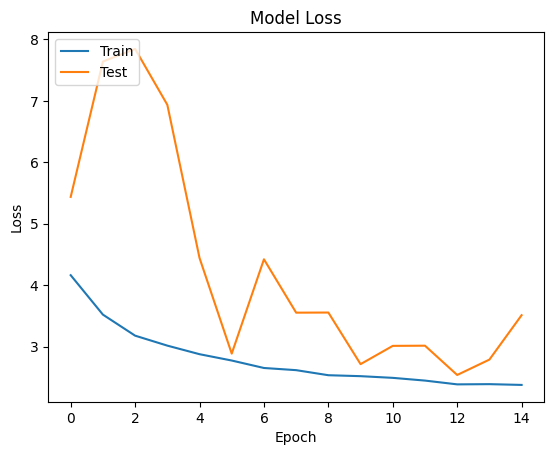

In [ ]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##추가 시도4

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# CIFAR-100 데이터셋 로드 및 전처리
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# 데이터 정규화
x_train, x_test = x_train / 255.0, x_test / 255.0

# 사전 훈련된 MobileNetV2 모델 로드
base_model = MobileNetV2(weights='imagenet', include_top=False, input_tensor=Input(shape=(32,32,3)))

# 모델의 마지막 몇 개의 층을 고정 해제
for layer in base_model.layers[-20:]:
    layer.trainable = True

# 새로운 분류 층 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x) # 노드 수를 1024에서 512로 줄임
x = Dropout(0.2)(x) # 수치 조정
predictions = Dense(100, activation='softmax')(x) # CIFAR-100은 100개의 클래스를 가짐

# 새로운 모델 정의
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.00005), loss='categorical_crossentropy', metrics=['accuracy'])

train_datagen = ImageDataGenerator(
    rotation_range=20,  # 더 작은 회전 범위
    width_shift_range=0.1,  # 이동 범위
    height_shift_range=0.1,  # 이동 범위
    shear_range=0.1,  # 전단 변환 범위
    zoom_range=0.1,  # 확대/축소 범위
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow(x_train, y_train, batch_size=32) #batch size 32

# 에폭 수를 늘림
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,
    epochs=30,  # 에폭 수 30
    validation_data=(x_test, y_test))

# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print('테스트 손실:', test_loss)
print('테스트 정확도:', test_acc)

169001437/169001437 [==============================] - 3s 0us/step


9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/30
1562/1562 [==============================] - 113s 49ms/step - loss: 4.6914 - accuracy: 0.0230 - val_loss: 4.6779 - val_accuracy: 0.0114
Epoch 2/30
1562/1562 [==============================] - 77s 49ms/step - loss: 4.3319 - accuracy: 0.0599 - val_loss: 4.5759 - val_accuracy: 0.0190
Epoch 3/30
1562/1562 [==============================] - 76s 48ms/step - loss: 4.1009 - accuracy: 0.0911 - val_loss: 4.4852 - val_accuracy: 0.0344
Epoch 4/30
1562/1562 [==============================] - 75s 48ms/step - loss: 3.8985 - accuracy: 0.1169 - val_loss: 4.2189 - val_accuracy: 0.0782
Epoch 5/30
1562/1562 [==============================] - 77s 49ms/step - loss: 3.7251 - accuracy: 0.1439 - val_loss: 3.7411 - val_accuracy: 0.1473
Epoch 6/30
1562/1562 [==============================] - 75s 48ms/step - loss: 3.5743 - accuracy: 0.1649 - val_loss: 3.3393 - val_accuracy: 0.2021
Epoch 7/30
1562/1562 [==============================] - 75s 

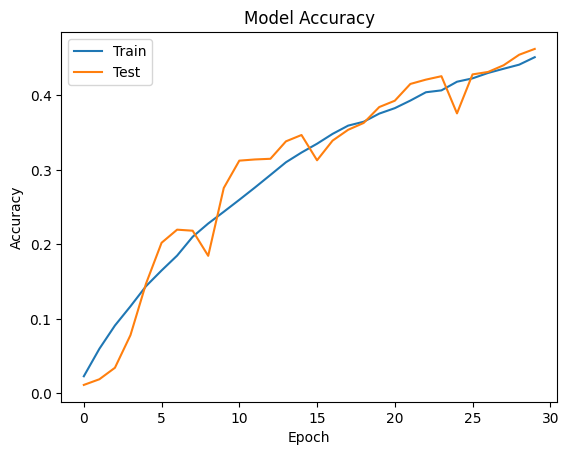

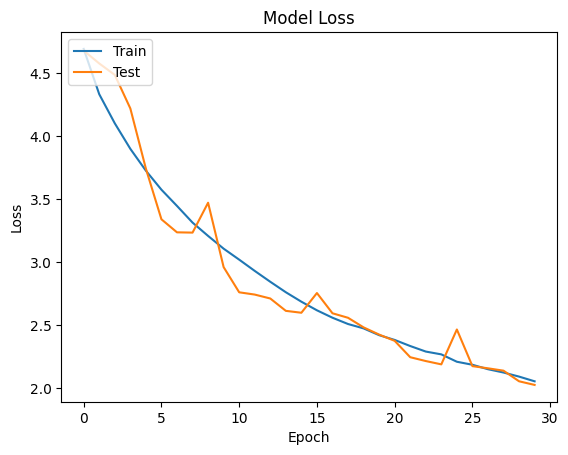

In [2]:
import matplotlib.pyplot as plt

# 훈련 및 검증 정확도 시각화
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 훈련 및 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

4번째 시도만에 학습이 정상적으로 이루어졌다.  
기존 테스트 정확도: 0.11110000312328339  
fine tuning 시 테스트 정확도: 0.46219998598098755